In [1]:
x = 0.3
y = 3
z = 1 + 5 * x - 0.3 * y 
print(z)

e = 2.7

P = 1 / (1 + 2.71828182845904**-z)
print(P)

1.6
0.8320183851339241


In [2]:
1 / (1-0.91)

11.111111111111114

In [3]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [4]:
data = pd.read_csv('data/task_data.csv')
print(data.head(5))

   SNo       X_1       X_2    y
0    0 -0.869144  0.389310  0.0
1    1 -0.993467 -0.610591  0.0
2    2 -0.834064  0.239236  0.0
3    3 -0.136471  0.632003  1.0
4    4  0.403887  0.310784  1.0


<AxesSubplot:>

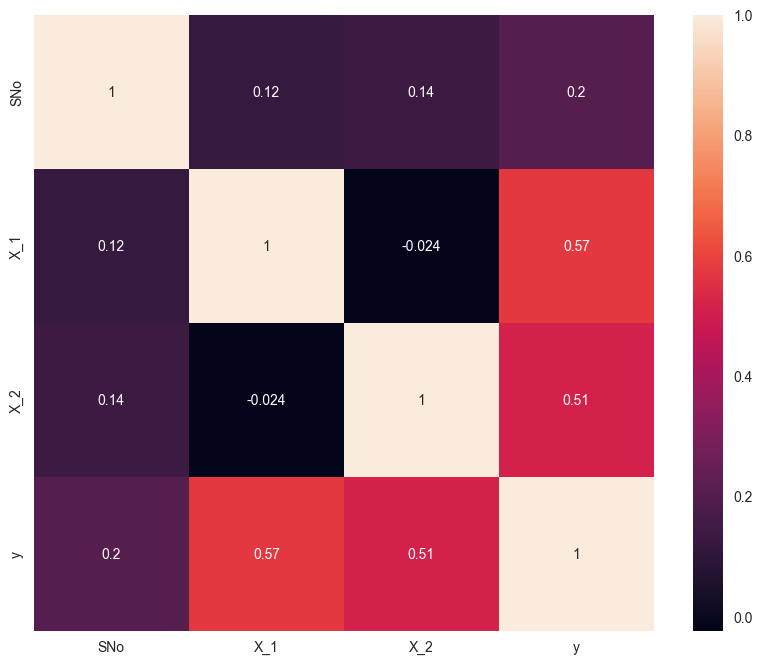

In [5]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True)

In [6]:
#Создаем матрицу наблюдений X и столбец с ответами y
X = data[['X_1', 'X_2']]
y = data['y']

In [7]:
#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [0.55556317]
w1, w2: [[2.80981798 2.58767105]]


In [8]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


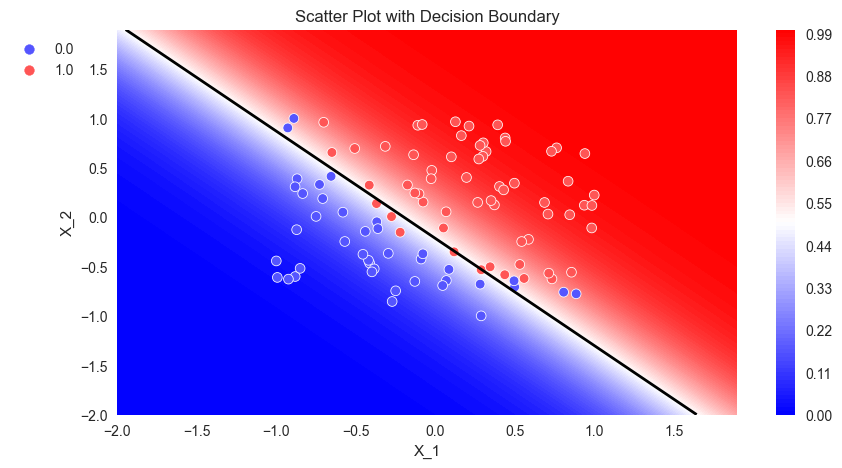

In [9]:
plot_probabilities_2d(X, y, log_reg_2d)

Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.

Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических 6 — как политические.

In [10]:
(6+14)/(6+9+14+6)

0.5714285714285714

In [11]:
from sklearn import metrics

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

metrics.precision_score(y_true, y_pred)

0.75

In [12]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

metrics.recall_score(y_true, y_pred)

0.6

In [13]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

metrics.f1_score(y_true, y_pred)

0.6666666666666665

In [14]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [15]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

In [17]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [18]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [20]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [21]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [22]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

# Train shape: (1881, 12)
# Test shape: (628, 12)

Train shape: (1881, 12)
Test shape: (628, 12)


In [24]:
print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


In [25]:
#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X_train, y_train)
#Выводим результирующие коэффициенты

y_train_pred = log_reg_2d.predict(X_train)
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = log_reg_2d.predict(X_test)
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

w0: [-0.31417843]
Train F1: 0.49
w1, w2: [[ 0.66422117 -0.44525713  2.32527514  0.57320309  0.36651464 -0.79992907
  -0.08109811 -0.96401918 -0.21493257  0.57608752 -1.23293867 -3.01088334]]
Test F1: 0.47


In [26]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
X_train_poly  = poly.transform(X_train)
X_test_poly  = poly.transform(X_test)
print(X_train_poly.shape)

(1881, 454)


In [27]:
#Создаем объект класса логистическая регрессия
log_reg_3d = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg_3d.fit(X_train_poly, y_train)
#Выводим результирующие коэффициенты

y_train_pred_poly  = log_reg_3d.predict(X_train_poly)
print('w0: {}'.format(log_reg_3d.intercept_)) #свободный член w0
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred_poly)))

y_test_pred_poly  = log_reg_3d.predict(X_test_poly)
# print('w1, w2: {}'.format(log_reg_3d.coef_)) #остальные параметры модели w1, w2, ..., wm
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_poly)))

w0: [-0.52543102]
Train F1: 0.66
Test F1: 0.64


In [28]:
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли

In [29]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.76
Test: 0.66


In [30]:
log_reg_poly = linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)

log_reg_poly.fit(X_train_poly, y_train)

y_train_pred_poly = log_reg_poly.predict(X_train_poly)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred_poly)))

y_test_pred_poly = log_reg_poly.predict(X_test_poly)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_poly)))

Train F1: 0.66
Test F1: 0.64


Text(0, 0.5, 'Score')

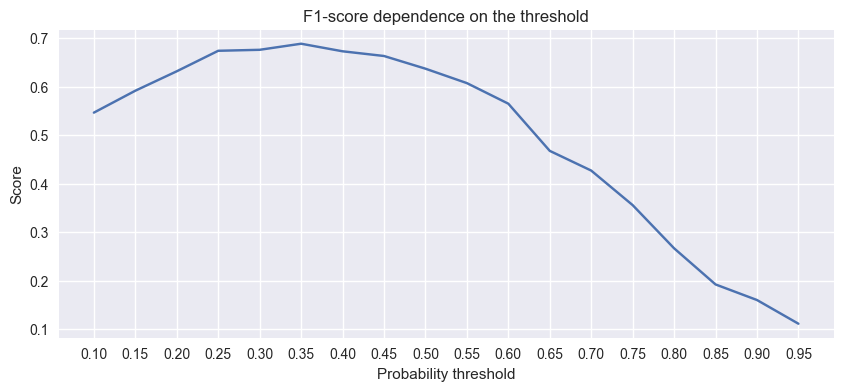

In [31]:
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, f1_scores, label='F1')
ax.set_title('F1-score dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

In [32]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.35
#Пациентов, для которых вероятность наличия диабета > 0.4 относим к классу 1
#В противном случае - к классу 0
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.69


In [33]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


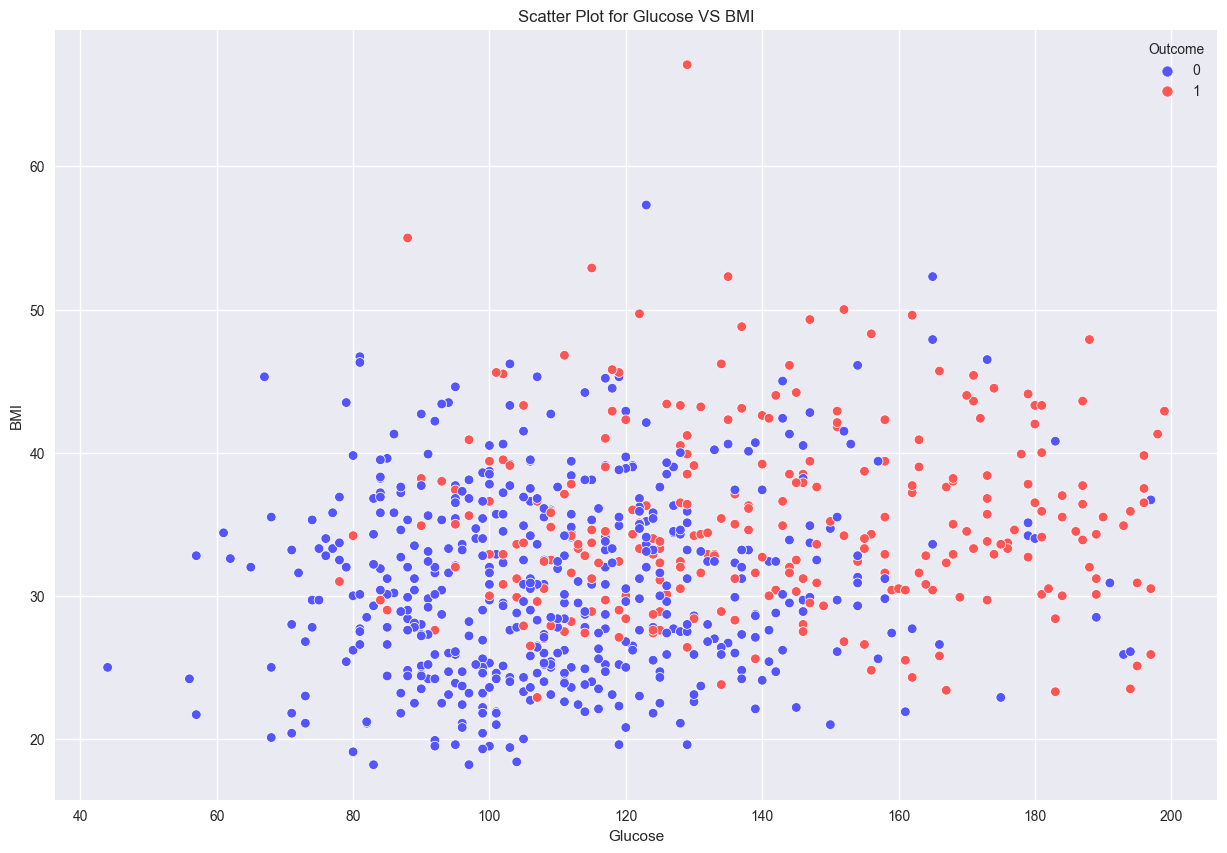

In [34]:
fig, ax = plt.subplots(figsize = (15, 10)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

In [35]:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [36]:
from sklearn import tree #модели деревьев решения

In [37]:
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 3,
    random_state = 42
)

dt_clf_2d.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.933\nsamples = 757\nvalue = [493, 264]\nclass = 0 - Not diabetic'),
 Text(0.25, 0.625, 'BMI <= 26.45\nentropy = 0.712\nsamples = 477\nvalue = [384, 93]\nclass = 0 - Not diabetic'),
 Text(0.125, 0.375, 'BMI <= 22.95\nentropy = 0.069\nsamples = 122\nvalue = [121, 1]\nclass = 0 - Not diabetic'),
 Text(0.0625, 0.125, 'entropy = 0.162\nsamples = 42\nvalue = [41, 1]\nclass = 0 - Not diabetic'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 80\nvalue = [80, 0]\nclass = 0 - Not diabetic'),
 Text(0.375, 0.375, 'Glucose <= 99.5\nentropy = 0.825\nsamples = 355\nvalue = [263, 92]\nclass = 0 - Not diabetic'),
 Text(0.3125, 0.125, 'entropy = 0.493\nsamples = 130\nvalue = [116, 14]\nclass = 0 - Not diabetic'),
 Text(0.4375, 0.125, 'entropy = 0.931\nsamples = 225\nvalue = [147, 78]\nclass = 0 - Not diabetic'),
 Text(0.75, 0.625, 'BMI <= 29.95\nentropy = 0.964\nsamples = 280\nvalue = [109, 171]\nclass = 1 - Diabetic'),
 Text(0.625, 0.375, 'Glucose <= 14

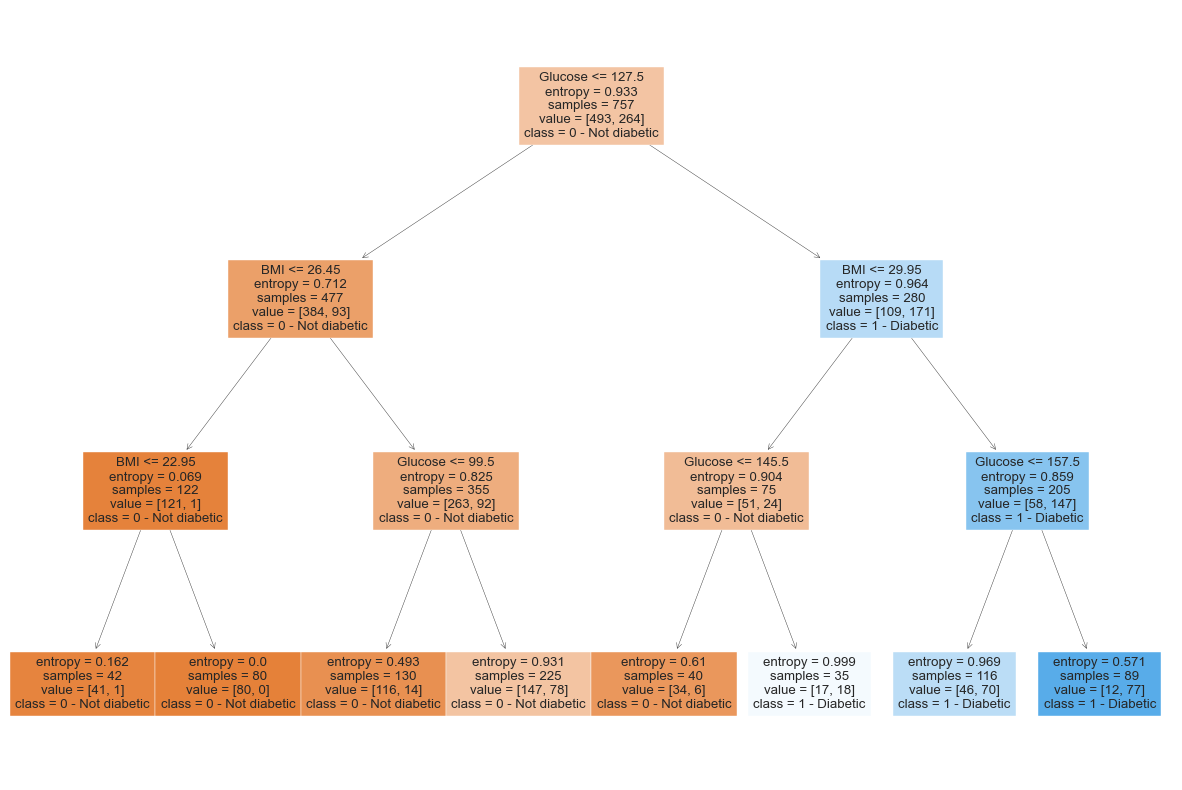

In [38]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(
    dt_clf_2d,
    feature_names=X.columns,
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    filled = True
)

In [39]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


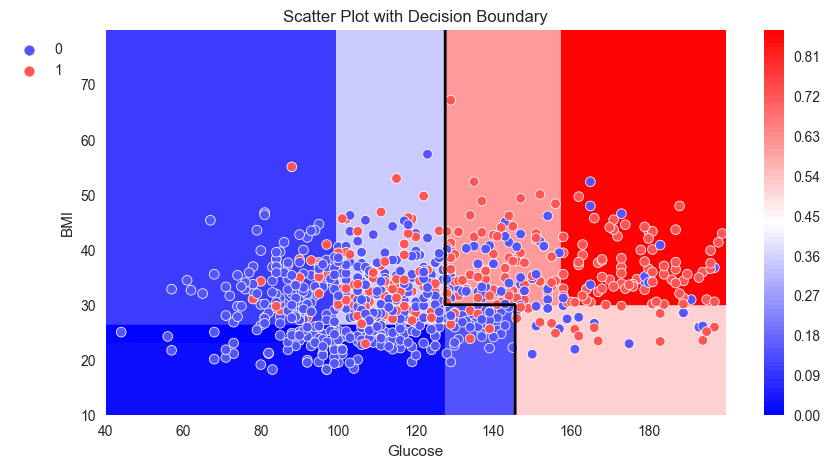

In [41]:
plot_probabilities_2d(X, y, dt_clf_2d)

In [42]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [43]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [44]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



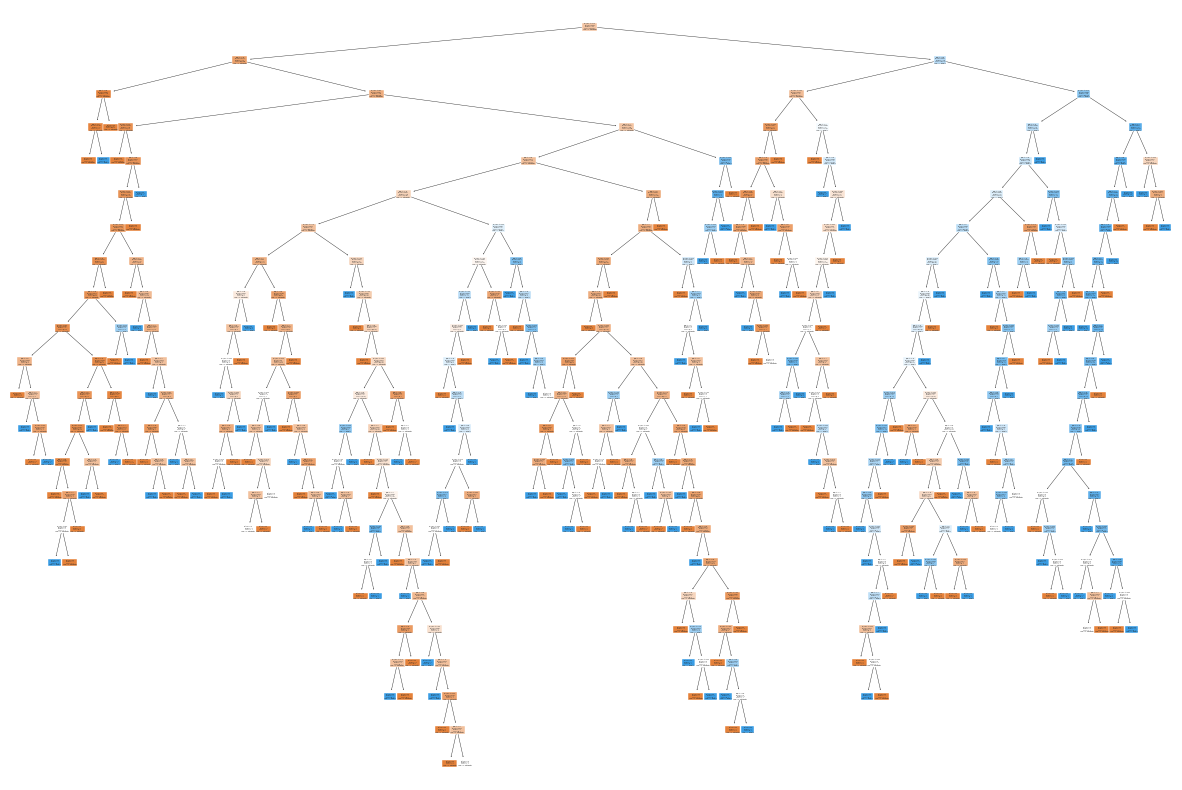

In [45]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


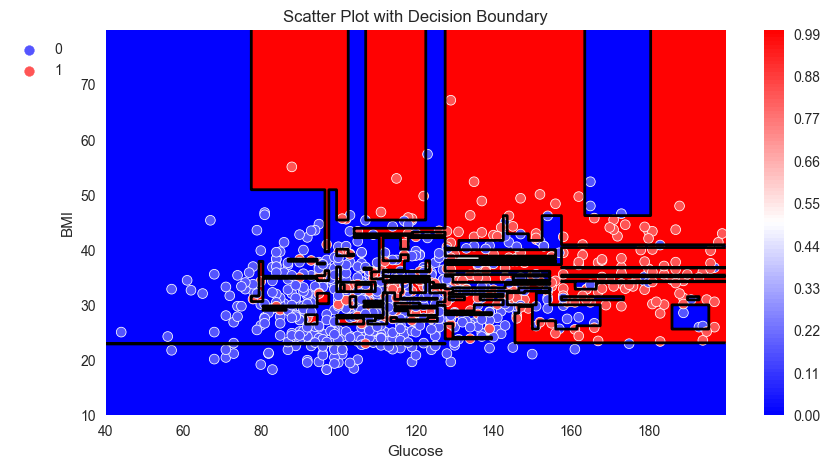

In [46]:
plot_probabilities_2d(X, y, dt_clf_bad)

In [47]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [48]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



In [49]:
print(dt_clf_full.feature_importances_)

[0.03459728 0.4229486  0.09024217 0.02659672 0.21891275 0.09997987
 0.1067226 ]


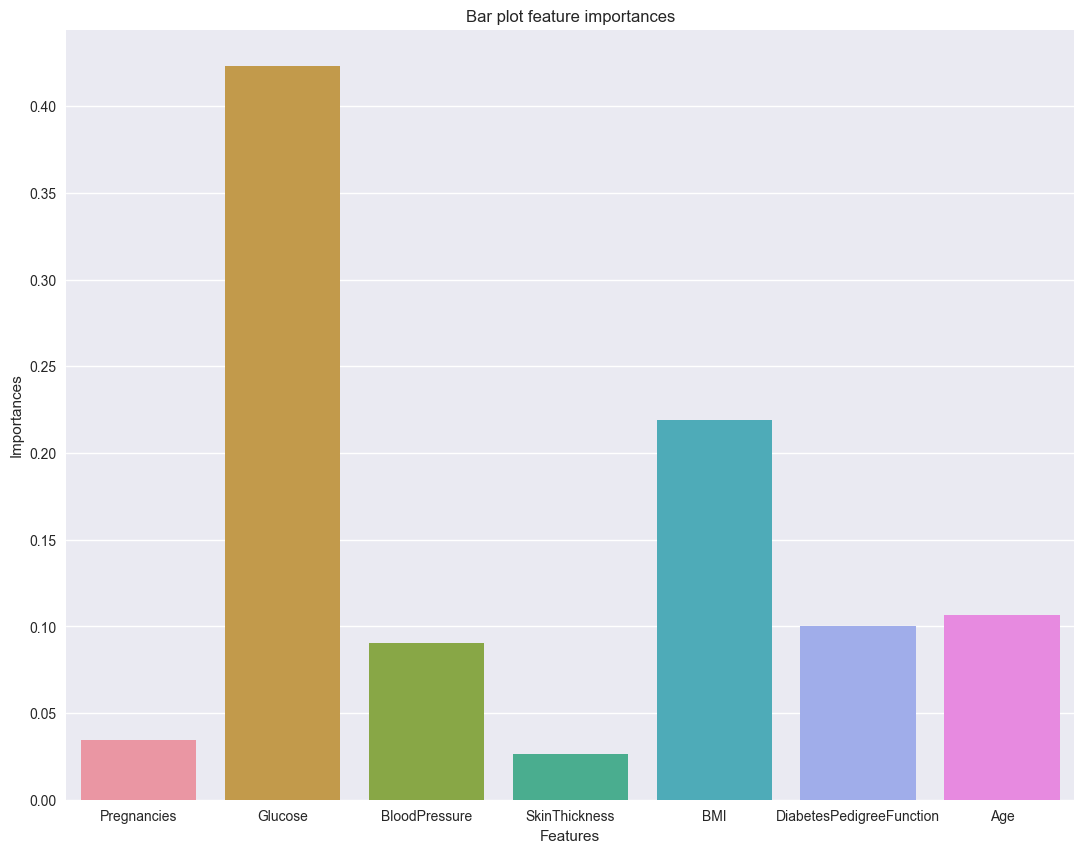

In [50]:
fig, ax = plt.subplots(figsize=(13, 10)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [52]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(
    max_depth=8,
    criterion='entropy',
    random_state=42,
    min_samples_leaf=10)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       random_state=42)

In [54]:
y_train_pred = dt.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = dt.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train F1: 0.72
Test F1: 0.64


In [55]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    criterion='entropy',
    random_state=42,
    min_samples_leaf=10)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = rf.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train F1: 0.74
Test F1: 0.66


In [56]:
thresholds = np.arange(0.1, 1, 0.05)

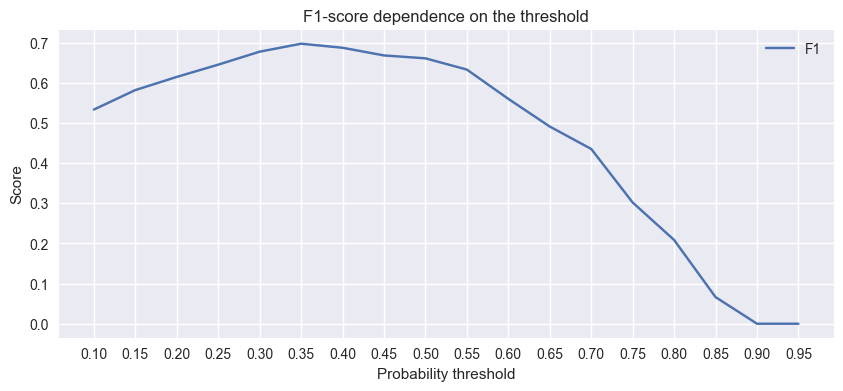

In [59]:
y_test_proba_pred = pd.Series(rf.predict_proba(X_test)[:, 1])
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, f1_scores, label='F1')
ax.set_title('F1-score dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [60]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.35
#Пациентов, для которых вероятность наличия диабета > 0.4 относим к классу 1
#В противном случае - к классу 0
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.70
